In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.seasonal as smts
import statsmodels.regression.linear_model as lm
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acovf

Name: Keshav Aggarwal
Roll No: QE2113

# Quiz 4

In [2]:
np.random.seed(1987)
e = np.random.normal(size=500)
time = np.arange(500)

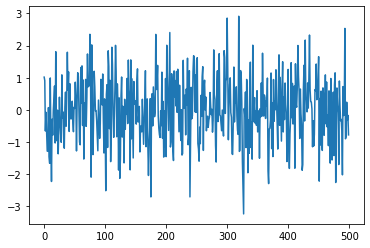

In [17]:
plt.plot(time,e)

In [3]:
q4_yt = [] #original Yt data
q4_yt.append(e[0])
for i in range(1,12):
    q4_yt.append(q4_yt[i-1] + e[i] + 0.9*e[i-1])
q4_yt.append(1.4*q4_yt[i-12] + q4_yt[i-1] + e[i] + 0.9*e[i-1])
for i in range(13,24):
    q4_yt.append(-1.4*q4_yt[i-13] + 1.4*q4_yt[i-12] + q4_yt[i-1] + e[i] + 0.9*e[i-1])
q4_yt.append(-0.4*q4_yt[i-24] - 1.4*q4_yt[i-13] + 1.4*q4_yt[i-12] + q4_yt[i-1] + e[i] + 0.9*e[i-1])
for i in range(25,500):
    q4_yt.append(0.4*q4_yt[i-25] - 0.4*q4_yt[i-24] - 1.4*q4_yt[i-13] + 1.4*q4_yt[i-12] + q4_yt[i-1] + e[i] + 0.9*e[i-1])

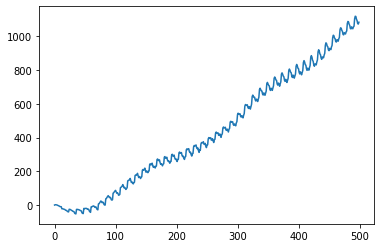

In [4]:
plt.plot(q4_yt);

In [14]:
q4_yt_transformed = [q4_yt[i] + q4_yt[i-13] - q4_yt[i-12] - q4_yt[i-1] for i in range(13,500) ] #Transformation of data i.e. applying simple differencing and seasonal differencing

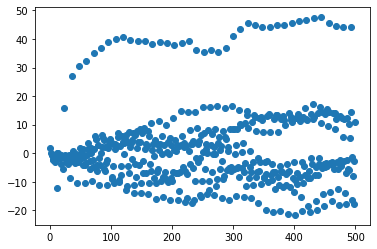

In [6]:
first_diff = [q4_yt[i] - q4_yt[i-1] for i in range(1,500)]
plt.scatter(time[1:],first_diff);

In [15]:
q4_yt_dif = [] # genenration of transformed data
q4_yt_dif.append(e[0])
for i in range(1,12):
    q4_yt_dif.append(e[i] + 0.9*e[i-1])
for i in range(12,500):
    q4_yt_dif.append(0.4*q4_yt_dif[i-12] + e[i] + 0.9*e[i-1])

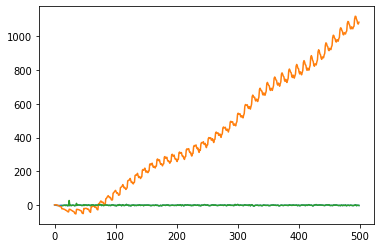

In [16]:
plt.plot(time,q4_yt_dif) #transformed data generated
plt.plot(time,q4_yt) #original data
plt.plot(time[13:],q4_yt_transformed) #transformed data from original data

Green is the transformed data. Orange represents the original time series Yt data.

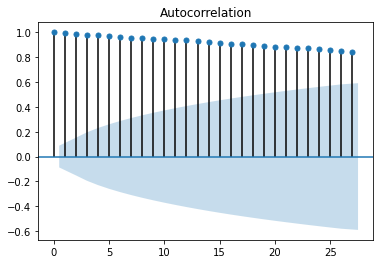

In [21]:
plot_acf(np.array(q4_yt)); #plots for original data

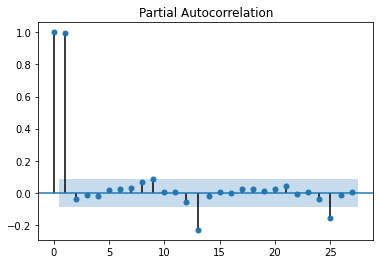

In [20]:
plot_pacf(np.array(q4_yt));

From the ACF and PACF plots of original data, we cannot conclude anything from the ACF plot, but from the PACF, we get some idea that it is AR(p)x(P) process where some values may be seasonal.

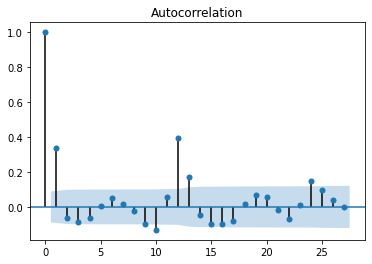

In [13]:
plot_acf(np.array(q4_yt_transformed)); #plots for transformed data

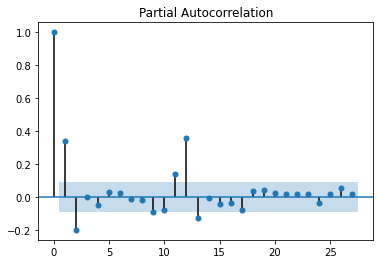

In [14]:
plot_pacf(np.array(q4_yt_transformed));

On observing the plots of ACF and PACF of transformed i.e. after applying simple and seasonal differencing of order 1, we conclude that there is a spike at lag value of 12 in both ACF and PACF plots, and at lag value of 1, indicating that the function is something of the form SARMA(1,1)X(1,1) for the monthly data.